copy from https://blog.naver.com/ckdgus1433/221443838135

# 모듈 임포팅

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# 데이터 로딩

In [ ]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

# Normalization

In [ ]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

# Flattening

In [ ]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))

# 노이즈 추가

In [ ]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000) 

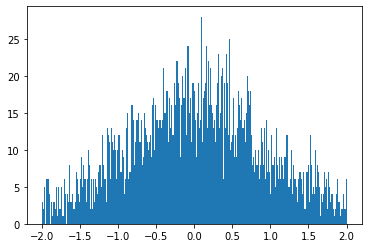

In [ ]:
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [ ]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
noisy_train_x = train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape) 
noisy_test_x = test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape) 

# 최대가 1, 최소가 0이 되도록 
noisy_train_x = np.clip(noisy_train_x, 0., 1.)
noisy_test_x = np.clip(noisy_test_x, 0., 1.)

# 노이즈 추가된 영상 보기

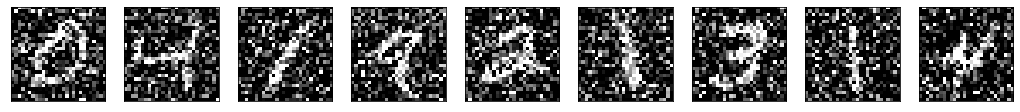

In [ ]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(noisy_train_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 모델 정의와 학습 실행

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(noisy_train_x, train_x, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/100
211/211 [==============================] - 4s 5ms/step - loss: 0.2745 - val_loss: 0.2154
Epoch 2/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1912 - val_loss: 0.1772
Epoch 3/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1693 - val_loss: 0.1624
Epoch 4/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1578 - val_loss: 0.1539
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1507 - val_loss: 0.1483
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1463 - val_loss: 0.1443
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1424 - val_loss: 0.1420
Epoch 8/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1393 - val_loss: 0.1393
Epoch 9/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1369 - val_loss: 0.1366
Epoch 10/100
211/211 [==============================] - 1s 4ms/step - loss: 0.1345 - val_lo

# 결과 확인

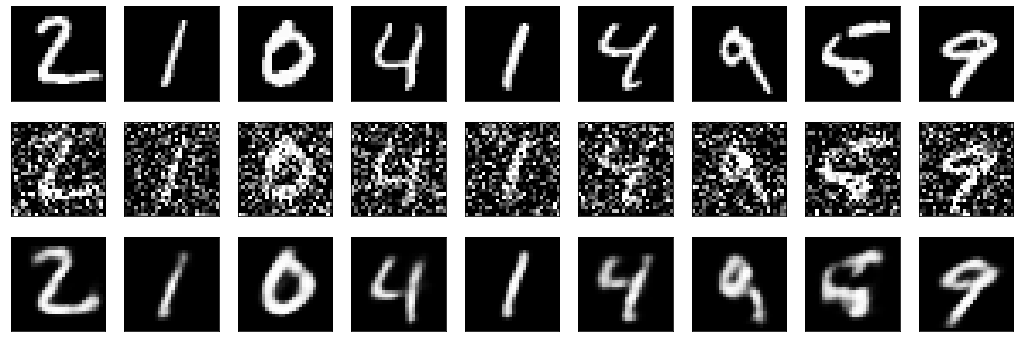

In [ ]:
decoded_imgs = model.predict(noisy_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(noisy_test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()